In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Logos

In [3]:
sintmaarten = pd.read_csv('sintmaarten_rooftop_solar_potential.csv')

In [4]:
sintmaarten.head(3)

,OBJECTID,uuid,City,Surface_area,Potential_installable_area,Peak_installable_capacity,Energy_potential_per_year,Assumed_building_type,Estimated_tilt,Estimated_building_height,Estimated_capacity_factor,Unit_installation_price,Date_added,Comment,aoi,roof_quality,Estimated_installation_efficiency
0,1,66a872cf-2809-419e-9160-2753ebeda9ad,StMaarten,37.599998,9.330000,1.81,2764.760010,Single-family residential,14.860000,5.76,1527.0,NaN,NaN,NaN,Upper Princes Quarter,Good,73.540001
1,2,d86b5784-dc64-4e58-89d4-72ef84a329a0,StMaarten,147.990005,68.930000,13.37,20418.259766,Single-family residential,16.620001,3.86,1527.0,NaN,NaN,NaN,Upper Princes Quarter,Good,137.970001
2,3,4eeef961-4ea6-4330-a2c7-361d45f21e52,StMaarten,166.410004,101.360001,19.66,34196.199219,Single-family residential,8.640000,6.84,1739.0,NaN,NaN,NaN,Little Bay Area,Good,205.500000


In [5]:
sintmaarten.columns

Index(['OBJECTID', 'uuid', 'City', 'Surface_area',
       'Potential_installable_area', 'Peak_installable_capacity',
       'Energy_potential_per_year', 'Assumed_building_type', 'Estimated_tilt',
       'Estimated_building_height', 'Estimated_capacity_factor',
       'Unit_installation_price', 'Date_added', 'Comment', 'aoi',
       'roof_quality', 'Estimated_installation_efficiency'],
      dtype='object')

As uuid and comment is not make sensor our taget, they will be removed

In [6]:
sintmaarten.drop(columns=['uuid','Comment'],axis = 1,inplace=True)

In [7]:
sintmaarten.columns

Index(['OBJECTID', 'City', 'Surface_area', 'Potential_installable_area',
       'Peak_installable_capacity', 'Energy_potential_per_year',
       'Assumed_building_type', 'Estimated_tilt', 'Estimated_building_height',
       'Estimated_capacity_factor', 'Unit_installation_price', 'Date_added',
       'aoi', 'roof_quality', 'Estimated_installation_efficiency'],
      dtype='object')

In [8]:
sintmaarten.head(1)

,OBJECTID,City,Surface_area,Potential_installable_area,Peak_installable_capacity,Energy_potential_per_year,Assumed_building_type,Estimated_tilt,Estimated_building_height,Estimated_capacity_factor,Unit_installation_price,Date_added,aoi,roof_quality,Estimated_installation_efficiency
0,1,StMaarten,37.599998,9.33,1.81,2764.76001,Single-family residential,14.86,5.76,1527.0,NaN,NaN,Upper Princes Quarter,Good,73.540001


In [9]:
sintmaarten['City'].value_counts()

City
StMaarten    15279
Name: count, dtype: int64

Drop 'City' for EDA

In [10]:
sintmaarten.drop(columns='City',axis=1,inplace=True)

In [11]:
sintmaarten.head(1)

,OBJECTID,Surface_area,Potential_installable_area,Peak_installable_capacity,Energy_potential_per_year,Assumed_building_type,Estimated_tilt,Estimated_building_height,Estimated_capacity_factor,Unit_installation_price,Date_added,aoi,roof_quality,Estimated_installation_efficiency
0,1,37.599998,9.33,1.81,2764.76001,Single-family residential,14.86,5.76,1527.0,NaN,NaN,Upper Princes Quarter,Good,73.540001


In [12]:
sintmaarten.shape

(15279, 14)

In [13]:
sintmaarten.dtypes

OBJECTID                               int64
Surface_area                         float64
Potential_installable_area           float64
Peak_installable_capacity            float64
Energy_potential_per_year            float64
Assumed_building_type                 object
Estimated_tilt                       float64
Estimated_building_height            float64
Estimated_capacity_factor            float64
Unit_installation_price              float64
Date_added                           float64
aoi                                   object
roof_quality                          object
Estimated_installation_efficiency    float64
dtype: object

Considering Common Columns

In [14]:
common_columns = [
    "City",
    "Surface_area",
    "Potential_installable_area",
    "Peak_installable_capacity",
    "Energy_potential_per_year",
    "Assumed_building_type",
    "Estimated_tilt",
    "Estimated_building_height",
    "Estimated_capacity_factor"
]

In [15]:
sintmaarten = sintmaarten[['Surface_area','Potential_installable_area','Peak_installable_capacity','Energy_potential_per_year','Assumed_building_type','Estimated_tilt','Estimated_building_height','Estimated_capacity_factor']]

In [16]:
num_col = sintmaarten.select_dtypes(include=['int64', 'float64'])

cat_col = sintmaarten.select_dtypes(exclude=['int64', 'float64'])

num_col.columns, cat_col.columns

(Index(['Surface_area', 'Potential_installable_area',
        'Peak_installable_capacity', 'Energy_potential_per_year',
        'Estimated_tilt', 'Estimated_building_height',
        'Estimated_capacity_factor'],
       dtype='object'),
 Index(['Assumed_building_type'], dtype='object'))

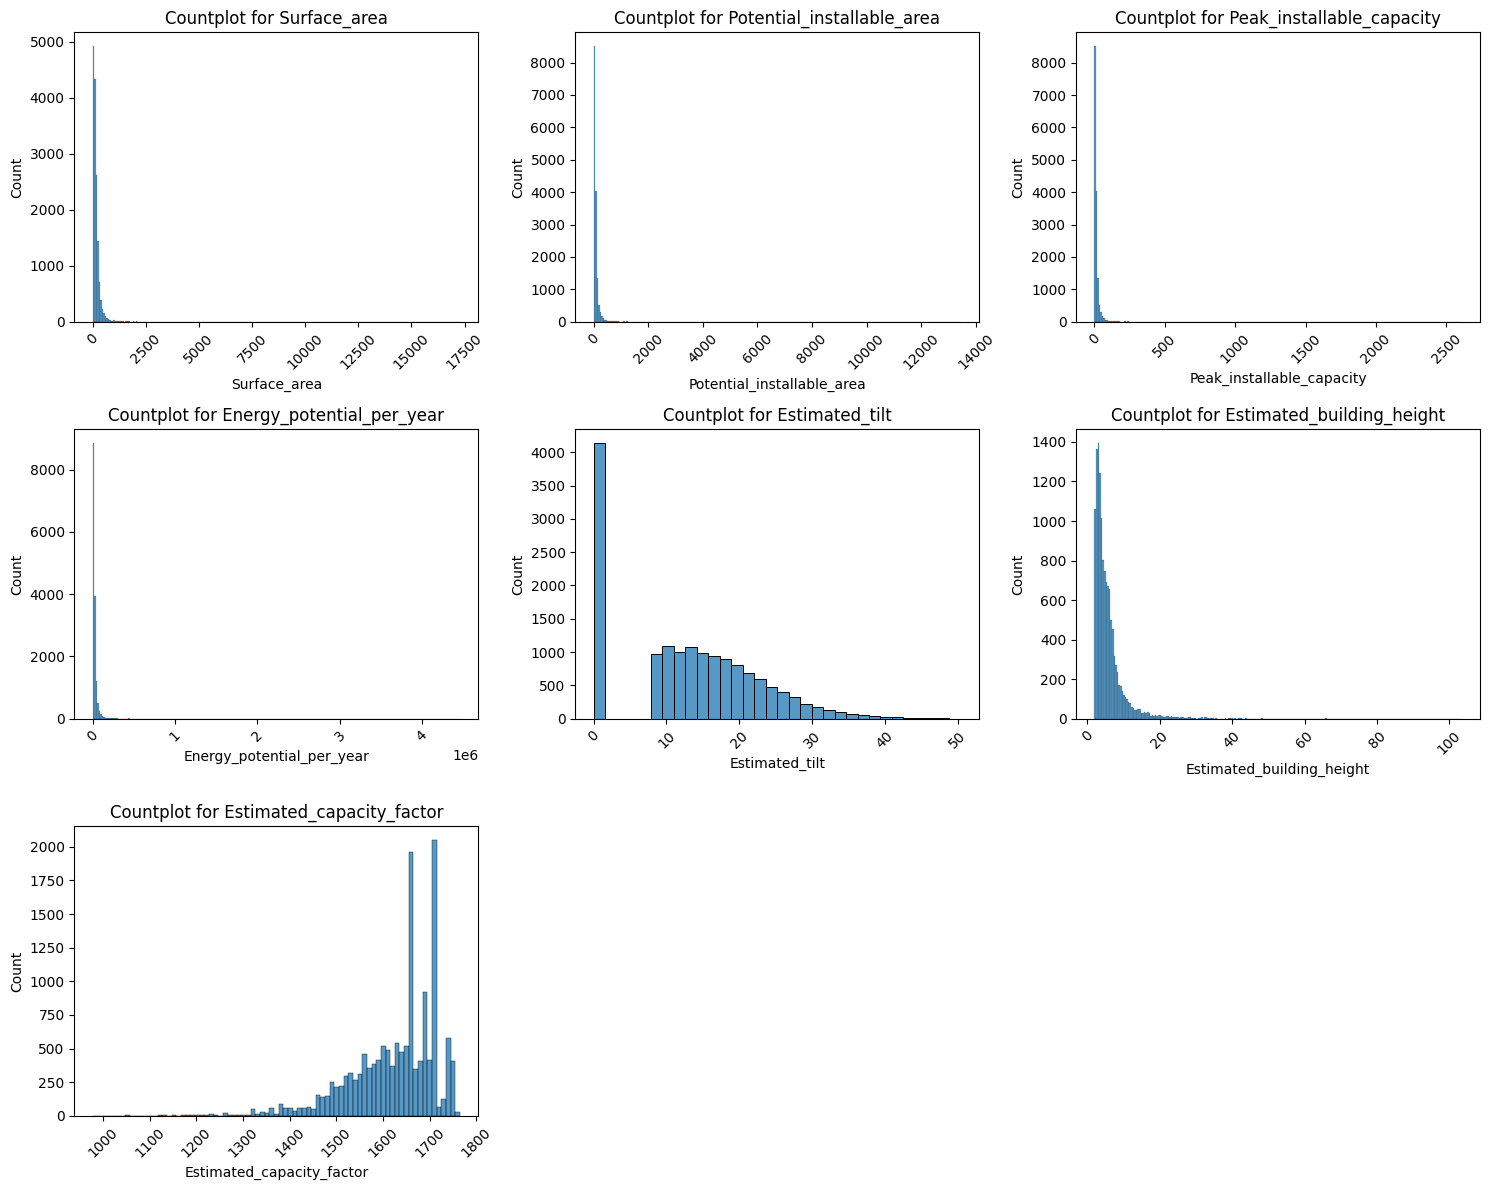

In [17]:
# Number of categorical columns
num_cols = len(num_col.columns)

# Set up the subplot grid dimensions
rows = (num_cols + 2) // 3  # Adjust the number of rows based on the number of columns
fig, axes = plt.subplots(rows, 3, figsize=(15, rows * 4))  # Customize the size as needed
axes = axes.flatten()  # Flatten to iterate over axes easily

# Iterate through the categorical columns and plot countplots
for i, col in enumerate(num_col.columns):
    sns.histplot(x=sintmaarten[col], ax=axes[i])
    axes[i].set_title(f'Countplot for {col}')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels if needed

# Remove unused subplot spaces
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

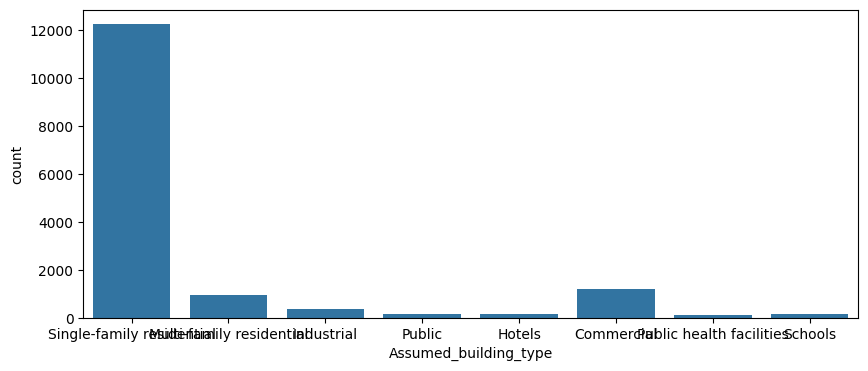

In [18]:
plt.figure(figsize=(10, 4))
sns.countplot(data=sintmaarten, x='Assumed_building_type')
plt.show()

BoxPlot

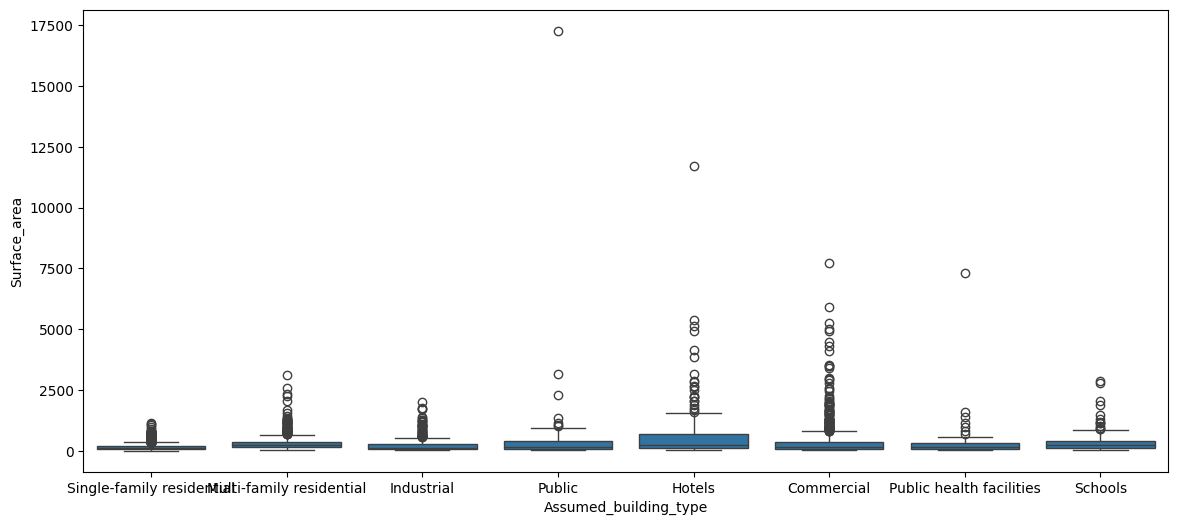

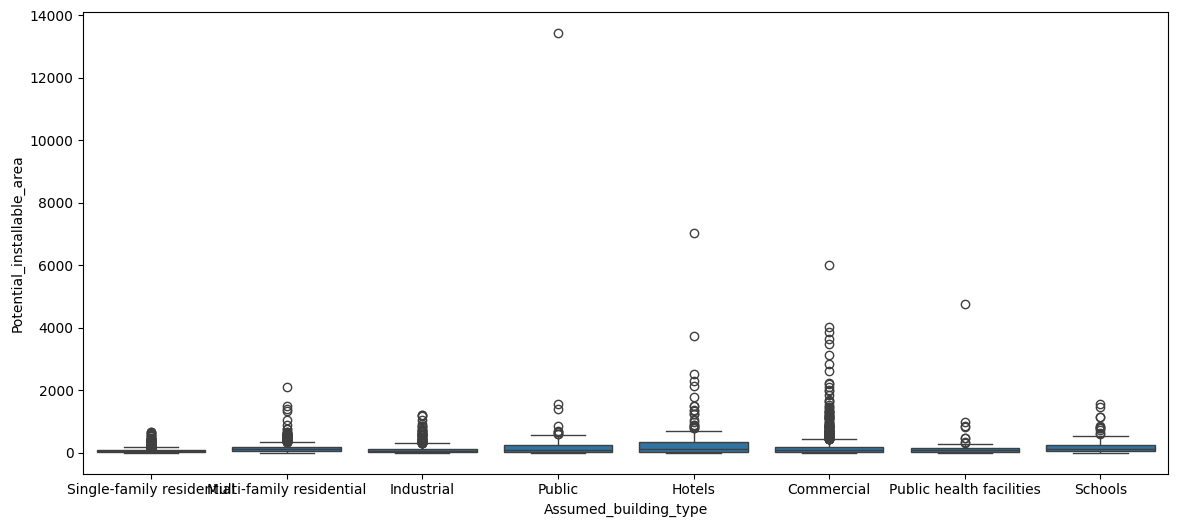

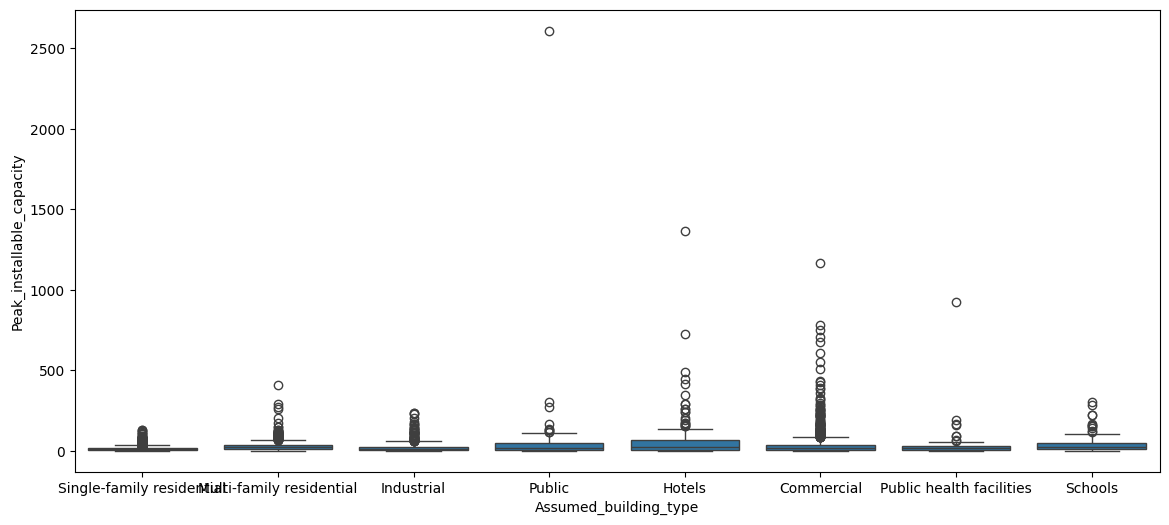

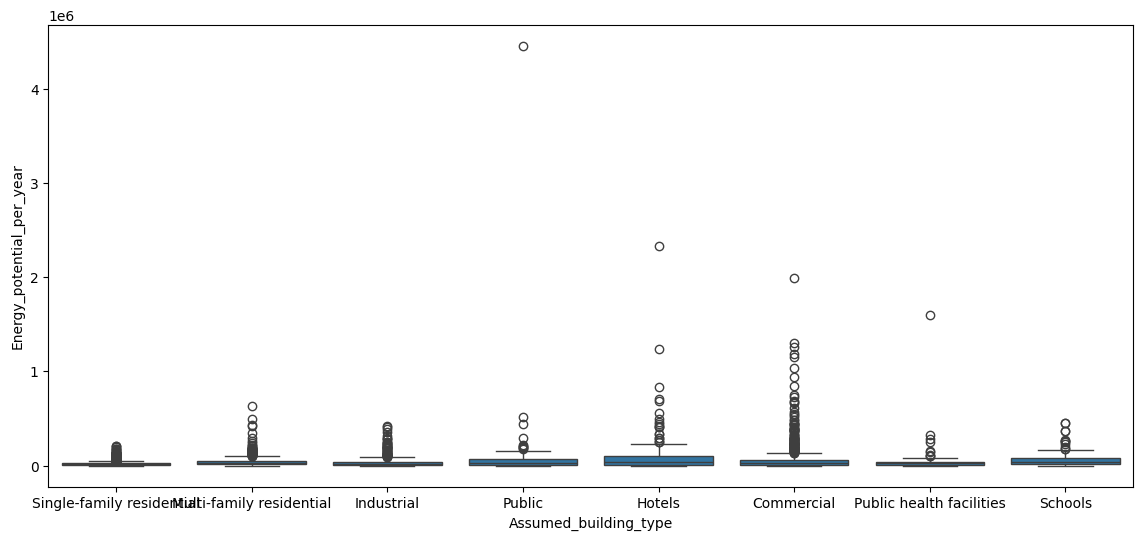

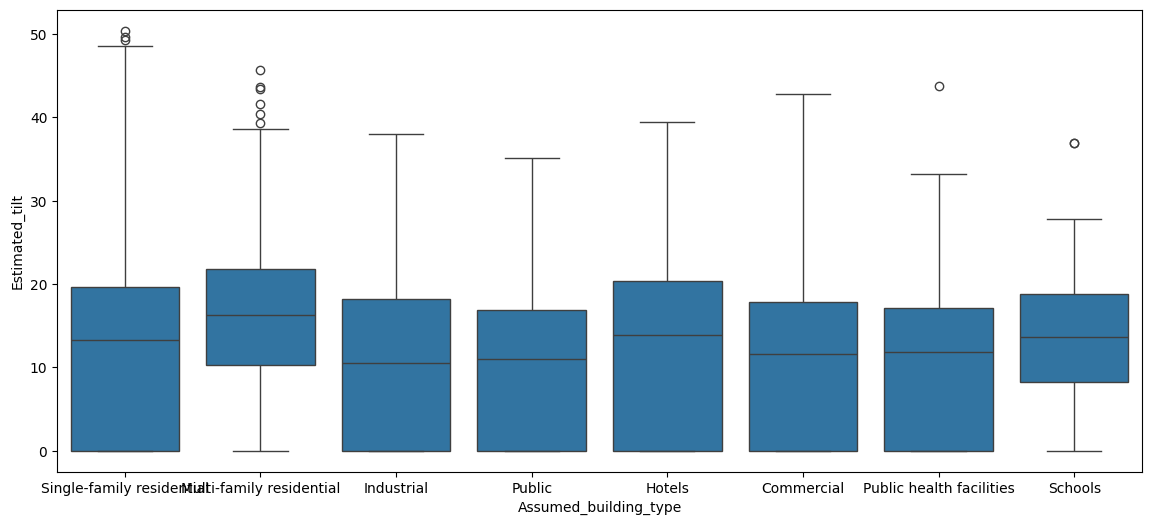

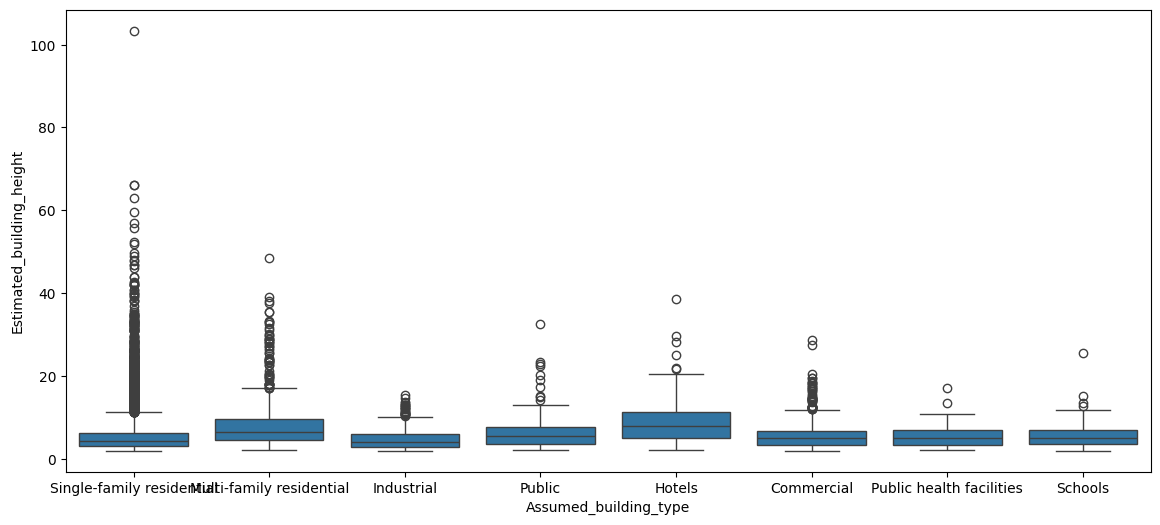

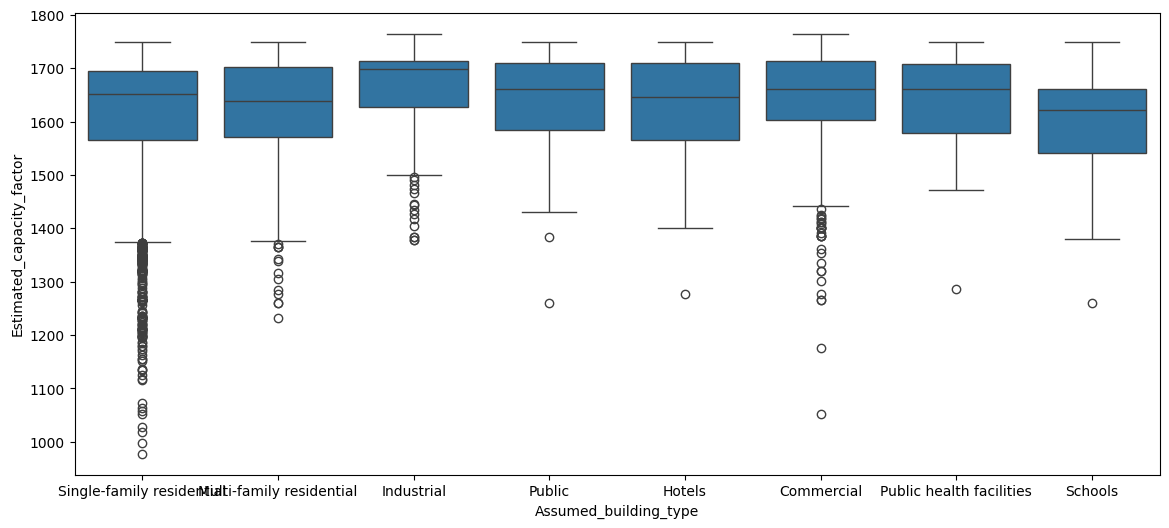

In [19]:
for i in num_col:
    plt.figure(figsize=(14, 6))
    sns.boxplot(x = sintmaarten['Assumed_building_type'], y = sintmaarten[i])
    plt.show()

In [20]:
def outlier_count(col, data = num_col):

    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [21]:
for col in num_col.columns:
    outlier_count(col)


---------------Surface_area---------------

Number of outliers: 906
Percent of data that is outlier: 5.93%

---------------Potential_installable_area---------------

Number of outliers: 1081
Percent of data that is outlier: 7.08%

---------------Peak_installable_capacity---------------

Number of outliers: 1081
Percent of data that is outlier: 7.08%

---------------Energy_potential_per_year---------------

Number of outliers: 1080
Percent of data that is outlier: 7.07%

---------------Estimated_tilt---------------

Number of outliers: 3
Percent of data that is outlier: 0.02%


Label Encoding

In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
sintmaarten['Assumed_building_type'] = le.fit_transform(sintmaarten['Assumed_building_type'])

In [23]:
sintmaarten['Assumed_building_type'].unique()

array([7, 3, 2, 4, 1, 0, 5, 6])

In [24]:
le.classes_

array(['Commercial', 'Hotels', 'Industrial', 'Multi-family residential',
       'Public', 'Public health facilities', 'Schools',
       'Single-family residential'], dtype=object)

In [25]:
sintmaarten.head(3)

,Surface_area,Potential_installable_area,Peak_installable_capacity,Energy_potential_per_year,Assumed_building_type,Estimated_tilt,Estimated_building_height,Estimated_capacity_factor
0,37.599998,9.330000,1.81,2764.760010,7,14.860000,5.76,1527.0
1,147.990005,68.930000,13.37,20418.259766,7,16.620001,3.86,1527.0
2,166.410004,101.360001,19.66,34196.199219,7,8.640000,6.84,1739.0


<Axes: >

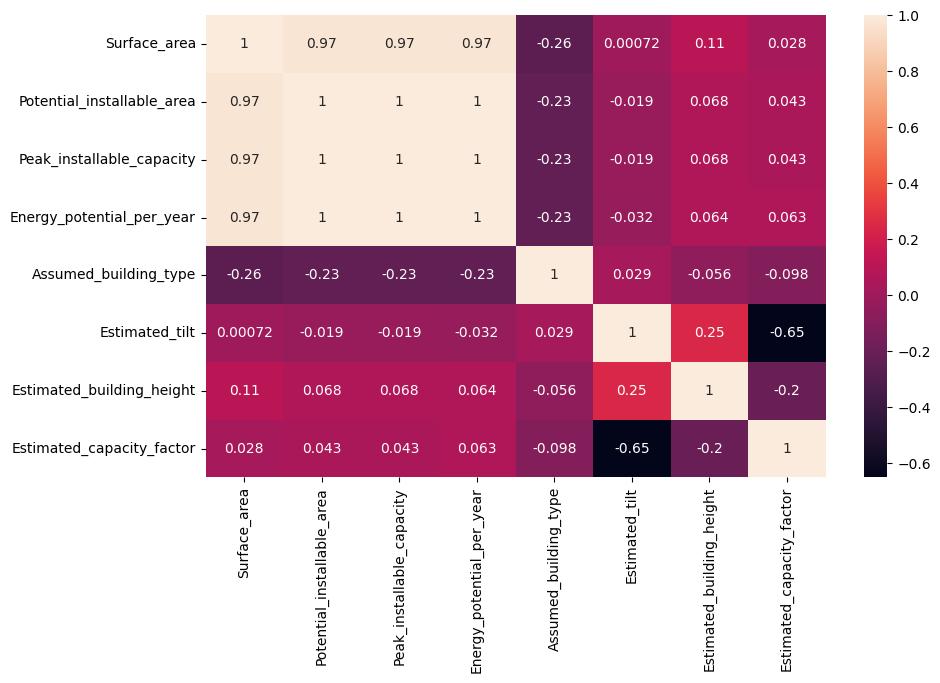

In [26]:
plt.figure(figsize=(10, 6))
sns.heatmap(sintmaarten.corr(), annot=True)